# Exploratory Data Analisys

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree  
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, matthews_corrcoef
from sklearn.model_selection import train_test_split

from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

import numpy as np
import pandas as pd
import itertools

import graphviz 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

# Plotting Confusion Matrix

In [2]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Statistics Tests

In [3]:
## Define Two Random Distributions

#Sample Size
N = 10

#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2

#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)


## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

# For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

## Std deviation
s = np.sqrt((var_a + var_b)/2)

## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

## Compare with the critical t-value with degrees of freedom
df = 2*N - 2

## mp-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

print("t = " + str(t))
print("p = " + str(2*p))

### Note that we multiply the p value by 2 because its a twp tail t-test
### You can see that after comparing the t statistic with the critical t value 
### (computed internally) we get a good p value of 0.0005 and thus we reject 
### the null hypothesis and thus it proves that the mean of the two distributions 
### are different and statistically significant.

## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(2*p2))

t = 3.9258837430973434
p = 0.0009906013477813946
t = 3.925883743097343
p = 0.0019812026955630642


In [4]:
# IMPORTANDO UM NOVO DATASET
data = pd.read_excel('DATASET_NUMERICO_ALUNOS_FORMADOS-EVADIDOS_2012-2018.xlsx')
data = data.drop(columns=['MATRICULA'])
data.head(20)

,ACAOAFIRMATIVA,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CR,ANOINGRESSO,IDADE,SEMESTREINGRESSO,COR,ESTADOCIVIL,TRANCAMENTOS,SEXO,STATUSFORMACAO
0,100,602.7,544.6,533.3,623.1,780.0,1,7.10,2012,24,1,0.0,0.0,0,0,1
1,100,616.9,620.2,564.3,605.1,700.0,1,8.40,2012,24,1,3.0,0.0,0,0,1
2,100,628.9,598.2,580.5,702.4,620.0,1,9.20,2012,24,1,0.0,0.0,0,0,1
3,100,591.2,561.4,519.2,662.8,760.0,1,8.00,2012,53,1,2.0,1.0,0,0,1
4,100,611.4,596.3,559.8,615.7,800.0,1,8.20,2012,26,1,0.0,0.0,0,0,1
5,100,485.0,593.3,521.5,633.1,840.0,1,6.70,2012,41,1,2.0,0.0,0,1,0
6,100,604.0,574.5,548.7,731.9,640.0,1,8.00,2012,25,1,0.0,0.0,0,0,1
7,100,586.1,507.4,485.5,589.3,880.0,1,8.00,2012,24,1,2.0,0.0,0,0,1
8,100,632.1,653.4,564.2,662.4,640.0,1,1.36,2012,39,1,0.0,0.0,1,0,0
9,100,662.2,587.2,521.9,628.1,700.0,1,8.90,2012,31,1,0.0,0.0,0,0,1


# 1) Data Preprocessing

In [5]:
print(data.shape)

(12171, 16)


In [6]:
# REMOVENDO AS COLUNAS DISCIPLINA E NOTA
#data = data.drop(columns=['MATRICULA','PERIODODISC','DISCIPLINA', 'NOTADISC', 'RESULTDISC', 'BAIRRO', 'CEP', 'CIDADE'])
data.head()

print(data.shape)

(12171, 16)


In [7]:
data["COR"] = data["COR"].fillna(100).astype(int)
data["ESTADOCIVIL"] = data["ESTADOCIVIL"].fillna(100).astype(int)

print("Quantidade de Campos NaN no Dataset: \n")
print(data.isnull().sum())
data = data.fillna(0).astype(float)

print("\n\nQuantidade de Campos NaN no Dataset: \n")
print(data.isnull().sum())
#data.head(20)

Quantidade de Campos NaN no Dataset: 

ACAOAFIRMATIVA      0
ENEMLINGUAGEM       4
ENEMHUMANAS         4
ENEMNATURAIS        4
ENEMMATEMATICA      4
ENEMREDACAO         4
CURSO               0
CR                  0
ANOINGRESSO         0
IDADE               0
SEMESTREINGRESSO    0
COR                 0
ESTADOCIVIL         0
TRANCAMENTOS        0
SEXO                0
STATUSFORMACAO      0
dtype: int64


Quantidade de Campos NaN no Dataset: 

ACAOAFIRMATIVA      0
ENEMLINGUAGEM       0
ENEMHUMANAS         0
ENEMNATURAIS        0
ENEMMATEMATICA      0
ENEMREDACAO         0
CURSO               0
CR                  0
ANOINGRESSO         0
IDADE               0
SEMESTREINGRESSO    0
COR                 0
ESTADOCIVIL         0
TRANCAMENTOS        0
SEXO                0
STATUSFORMACAO      0
dtype: int64


In [8]:
dataUnique = data.drop_duplicates(keep='first')

# Exportar o XLS e validar o arquivo (Abrir automaticamente =D)
print(dataUnique.shape)

(12171, 16)


In [9]:
np.unique(dataUnique.COR, return_counts=True)

(array([  0.,   1.,   2.,   3., 100.]), array([8717,  574, 1709, 1129,   42]))

In [10]:
np.unique(dataUnique.ACAOAFIRMATIVA, return_counts=True)

(array([  0.,   1.,   2.,   3.,   4.,   5., 100.]),
 array([7319,  269,  631,  216,  625,  705, 2406]))

In [11]:
total, card = dataUnique.shape

In [12]:
dataUnique.head(20)

,ACAOAFIRMATIVA,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CR,ANOINGRESSO,IDADE,SEMESTREINGRESSO,COR,ESTADOCIVIL,TRANCAMENTOS,SEXO,STATUSFORMACAO
0,100.0,602.7,544.6,533.3,623.1,780.0,1.0,7.10,2012.0,24.0,1.0,0.0,0.0,0.0,0.0,1.0
1,100.0,616.9,620.2,564.3,605.1,700.0,1.0,8.40,2012.0,24.0,1.0,3.0,0.0,0.0,0.0,1.0
2,100.0,628.9,598.2,580.5,702.4,620.0,1.0,9.20,2012.0,24.0,1.0,0.0,0.0,0.0,0.0,1.0
3,100.0,591.2,561.4,519.2,662.8,760.0,1.0,8.00,2012.0,53.0,1.0,2.0,1.0,0.0,0.0,1.0
4,100.0,611.4,596.3,559.8,615.7,800.0,1.0,8.20,2012.0,26.0,1.0,0.0,0.0,0.0,0.0,1.0
5,100.0,485.0,593.3,521.5,633.1,840.0,1.0,6.70,2012.0,41.0,1.0,2.0,0.0,0.0,1.0,0.0
6,100.0,604.0,574.5,548.7,731.9,640.0,1.0,8.00,2012.0,25.0,1.0,0.0,0.0,0.0,0.0,1.0
7,100.0,586.1,507.4,485.5,589.3,880.0,1.0,8.00,2012.0,24.0,1.0,2.0,0.0,0.0,0.0,1.0
8,100.0,632.1,653.4,564.2,662.4,640.0,1.0,1.36,2012.0,39.0,1.0,0.0,0.0,1.0,0.0,0.0
9,100.0,662.2,587.2,521.9,628.1,700.0,1.0,8.90,2012.0,31.0,1.0,0.0,0.0,0.0,0.0,1.0


# 2) Descriptive Analisys

In [13]:
# Evaluating dataset by some descriptive metrics
dataUnique.describe()

,ACAOAFIRMATIVA,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CR,ANOINGRESSO,IDADE,SEMESTREINGRESSO,COR,ESTADOCIVIL,TRANCAMENTOS,SEXO,STATUSFORMACAO
count,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000
mean,20.442363,595.966264,632.192236,581.271333,667.497601,714.937967,121.376140,4.520050,2013.135732,26.719004,1.398160,0.951360,0.664120,0.033194,0.500698,0.224468
std,39.518695,56.516676,72.197326,71.088885,98.590747,133.899676,139.144997,3.157384,0.727202,6.776288,0.489539,5.920281,7.928475,0.200367,0.500020,0.417249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2012.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,566.500000,589.000000,540.500000,610.250000,620.000000,22.000000,1.500000,2013.000000,23.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,601.400000,638.600000,587.000000,675.900000,720.000000,50.000000,4.600000,2013.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.000000,633.100000,681.900000,628.600000,734.800000,800.000000,242.000000,7.600000,2014.000000,27.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,100.000000,786.000000,885.500000,845.200000,955.200000,1000.000000,562.000000,10.000000,2014.000000,98.000000,2.000000,100.000000,100.000000,3.000000,1.000000,1.000000


In [14]:
dataUnique.corr()

,ACAOAFIRMATIVA,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CR,ANOINGRESSO,IDADE,SEMESTREINGRESSO,COR,ESTADOCIVIL,TRANCAMENTOS,SEXO,STATUSFORMACAO
ACAOAFIRMATIVA,1.000000,0.021634,-0.407764,-0.145895,-0.098986,-0.090515,0.052342,0.037532,-0.770275,0.132761,-0.039554,-0.011028,0.015549,0.060564,-0.037607,0.141332
ENEMLINGUAGEM,0.021634,1.000000,0.614555,0.541341,0.438708,0.313196,-0.151655,0.145490,-0.039238,-0.083885,-0.135540,-0.018888,-0.014822,0.019853,0.010510,0.103990
ENEMHUMANAS,-0.407764,0.614555,1.000000,0.654933,0.518230,0.313036,-0.168681,0.092756,0.300394,-0.063348,-0.102817,-0.012200,-0.024483,-0.015149,0.154643,0.013021
ENEMNATURAIS,-0.145895,0.541341,0.654933,1.000000,0.698277,0.274510,-0.220169,0.107183,0.083880,-0.196426,-0.102055,-0.008244,-0.031865,0.012260,0.173998,0.039924
ENEMMATEMATICA,-0.098986,0.438708,0.518230,0.698277,1.000000,0.187315,-0.220076,0.075601,0.005501,-0.199193,-0.084105,-0.027084,-0.031860,0.012379,0.254749,0.041957
ENEMREDACAO,-0.090515,0.313196,0.313036,0.274510,0.187315,1.000000,-0.149085,0.141183,0.096482,-0.105227,-0.162096,0.013065,-0.027685,0.011715,-0.111249,0.099877
CURSO,0.052342,-0.151655,-0.168681,-0.220169,-0.220076,-0.149085,1.000000,0.013290,-0.012244,0.090958,-0.036963,-0.012272,0.012507,0.001936,0.017798,0.014998
CR,0.037532,0.145490,0.092756,0.107183,0.075601,0.141183,0.013290,1.000000,-0.101140,-0.148955,-0.118558,0.024448,-0.010904,0.043501,-0.204750,0.622791
ANOINGRESSO,-0.770275,-0.039238,0.300394,0.083880,0.005501,0.096482,-0.012244,-0.101140,1.000000,-0.119605,-0.005253,0.025792,-0.002624,-0.093520,0.041093,-0.223096
IDADE,0.132761,-0.083885,-0.063348,-0.196426,-0.199193,-0.105227,0.090958,-0.148955,-0.119605,1.000000,-0.006126,0.019199,0.036099,0.027447,0.087095,-0.057377


## Majority Class

#### Observation to Dropout and Conclusion

In [15]:
dataUnique.groupby(['STATUSFORMACAO']).agg(['count', 'median'])

ACAOAFIRMATIVA        ENEMLINGUAGEM        ENEMHUMANAS          \
                        count median         count median       count  median   
STATUSFORMACAO                                                                  
0.0                      9439    0.0          9439  598.7        9439  638.50   
1.0                      2732    0.0          2732  612.4        2732  638.95   

               ENEMNATURAIS         ENEMMATEMATICA         ...    \
                      count  median          count median  ...     
STATUSFORMACAO                                             ...     
0.0                    9439  585.30           9439  674.1  ...     
1.0                    2732  592.05           2732  683.0  ...     

               SEMESTREINGRESSO          COR        ESTADOCIVIL         \
                          count median count median       count median   
STATUSFORMACAO                                                           
0.0                        9439    1.0  9439    0.0        9439    0.0   
1.0                        2732    1.0  2732    0.0        2732    0.0   

               TRANCAMENTOS         SEXO         
                      count median count median  
STATUSFORMACAO                                   
0.0                    9439    0.0  9439    1.0  
1.0                    2732    0.0  2732    0.0  

[2 rows x 30 columns]

In [16]:
dataEvad = len(dataUnique.query('STATUSFORMACAO == 0'))
print("Dropout Percent: ", (dataEvad/total)*100)

Dropout Percent:  77.55320023005505


In [17]:
dataForm = len(dataUnique.query('STATUSFORMACAO == 1'))
print("Graduated Percent: ", (dataForm/total)*100)

Graduated Percent:  22.44679976994495


In [18]:
dataUnique.corr()['STATUSFORMACAO'].sort_values()

ANOINGRESSO        -0.223096
SEXO               -0.160259
SEMESTREINGRESSO   -0.114558
IDADE              -0.057377
TRANCAMENTOS       -0.004605
ESTADOCIVIL         0.004362
COR                 0.011239
ENEMHUMANAS         0.013021
CURSO               0.014998
ENEMNATURAIS        0.039924
ENEMMATEMATICA      0.041957
ENEMREDACAO         0.099877
ENEMLINGUAGEM       0.103990
ACAOAFIRMATIVA      0.141332
CR                  0.622791
STATUSFORMACAO      1.000000
Name: STATUSFORMACAO, dtype: float64

## Grade Point Average (GPA)

#### Detailled statistics to GPA

In [19]:
dataUnique.CR.describe()

count    12171.000000
mean         4.520050
std          3.157384
min          0.000000
25%          1.500000
50%          4.600000
75%          7.600000
max         10.000000
Name: CR, dtype: float64

## Ethnicity

In [20]:
dataUnique.groupby(['COR']).agg(['count','mean', 'median'])

ACAOAFIRMATIVA                   ENEMLINGUAGEM                     \
               count       mean median         count        mean median   
COR                                                                       
0.0             8717  22.368475    0.0          8717  598.496513  604.1   
1.0              574  15.506969    2.0           574  574.737456  582.1   
2.0             1709  16.995904    0.0          1709  599.219602  604.0   
3.0             1129  13.229407    2.0          1129  582.568468  587.0   
100.0             42  22.261905    0.0            42  588.711905  592.6   

      ENEMHUMANAS                    ENEMNATURAIS  ...   ESTADOCIVIL  \
            count        mean median        count  ...        median   
COR                                                ...                 
0.0          8717  633.527464  641.1         8717  ...           0.0   
1.0           574  611.454530  618.4          574  ...           0.0   
2.0          1709  638.334757  643.2         1709  ...           0.0   
3.0          1129  623.510363  625.9         1129  ...           0.0   
100.0          42  621.919048  624.9           42  ...           0.0   

      TRANCAMENTOS                   SEXO                  STATUSFORMACAO  \
             count      mean median count      mean median          count   
COR                                                                         
0.0           8717  0.032924    0.0  8717  0.500402    1.0           8717   
1.0            574  0.047038    0.0   574  0.468641    0.0            574   
2.0           1709  0.032768    0.0  1709  0.509655    1.0           1709   
3.0           1129  0.027458    0.0  1129  0.512843    1.0           1129   
100.0           42  0.071429    0.0    42  0.309524    0.0             42   

                        
           mean median  
COR                     
0.0    0.213491    0.0  
1.0    0.235192    0.0  
2.0    0.276770    0.0  
3.0    0.223206    0.0  
100.0  0.261905    0.0  

[5 rows x 45 columns]

## Gender

In [21]:
dataUnique.groupby(['SEXO']).agg(['count','mean', 'median'])

ACAOAFIRMATIVA                   ENEMLINGUAGEM                     \
              count       mean median         count        mean median   
SEXO                                                                     
0.0            6077  21.930558    0.0          6077  595.371466  601.5   
1.0            6094  18.958320    0.0          6094  596.559403  601.4   

     ENEMHUMANAS                    ENEMNATURAIS  ...      COR ESTADOCIVIL  \
           count        mean median        count  ...   median       count   
SEXO                                              ...                        
0.0         6077  621.012243  626.8         6077  ...      0.0        6077   
1.0         6094  643.341040  650.1         6094  ...      0.0        6094   

                      TRANCAMENTOS                  STATUSFORMACAO            \
          mean median        count      mean median          count      mean   
SEXO                                                                           
0.0   0.639296    0.0         6077  0.038012    0.0           6077  0.291427   
1.0   0.688874    0.0         6094  0.028389    0.0           6094  0.157696   

             
     median  
SEXO         
0.0     0.0  
1.0     0.0  

[2 rows x 45 columns]

## Age

In [22]:
dataUnique.groupby(['IDADE']).agg(['count','mean', 'median'])

ACAOAFIRMATIVA                    ENEMLINGUAGEM                      \
               count        mean median         count        mean  median   
IDADE                                                                       
20.0               2    0.500000    0.5             2  688.100000  688.10   
21.0             161    0.826087    0.0           161  603.830435  602.40   
22.0            1456    0.898352    0.0          1456  600.414286  603.90   
23.0            2690    4.387361    0.0          2690  599.558773  603.60   
24.0            2329   25.620867    0.0          2329  598.336969  602.70   
25.0            1268   37.242902    2.0          1268  593.229732  601.70   
26.0             757   34.709379    2.0           757  593.417305  600.30   
27.0             544   30.272059    0.0           544  590.523346  597.10   
28.0             418   31.813397    1.0           418  594.248565  601.90   
29.0             328   28.466463    0.0           328  595.414024  601.40   
30.0             276   25.061594    0.0           276  597.989130  601.15   
31.0             239   29.661088    1.0           239  597.524686  607.70   
32.0             198   28.449495    3.0           198  594.633333  607.00   
33.0             191   30.659686    2.0           191  592.888482  601.50   
34.0             139   33.985612    4.0           139  594.987770  600.80   
35.0             122   31.204918    2.0           122  591.495902  599.40   
36.0             110   23.845455    1.5           110  590.282727  591.70   
37.0             101   35.316832    2.0           101  599.285149  604.50   
38.0              76   28.855263    4.0            76  591.163158  591.60   
39.0              65   33.169231    3.0            65  586.258462  586.70   
40.0              65   30.000000    2.0            65  577.907692  584.70   
41.0              42   31.476190    0.5            42  605.119048  613.30   
42.0              50   34.720000    1.5            50  589.326000  593.40   
43.0              39   28.974359    0.0            39  568.256410  577.80   
44.0              44   19.136364    0.0            44  580.106818  583.20   
45.0              35   15.057143    0.0            35  573.997143  577.60   
46.0              44   27.863636    0.0            44  585.754545  592.25   
47.0              34   18.411765    0.0            34  580.055882  585.75   
48.0              24   21.583333    0.0            24  597.150000  599.90   
49.0              29   21.172414    0.0            29  563.806897  560.20   
50.0              42   34.047619    2.0            42  577.947619  579.10   
51.0              40   13.375000    0.0            40  571.487500  573.75   
52.0              22   28.090909    1.0            22  579.681818  594.00   
53.0              31   39.032258    0.0            31  574.538710  570.60   
54.0              24   58.875000  100.0            24  588.425000  591.00   
55.0              13   23.846154    0.0            13  556.292308  567.60   
56.0              18   23.611111    2.0            18  572.533333  564.05   
57.0              21   33.904762    2.0            21  586.847619  595.30   
58.0              14   28.714286    0.0            14  580.550000  574.75   
59.0              13    8.923077    0.0            13  556.384615  572.90   
60.0              12   25.583333    0.0            12  593.341667  605.35   
61.0               8   13.750000    0.0             8  565.175000  577.30   
62.0               9    1.111111    0.0             9  578.277778  587.50   
63.0              10   21.000000    0.0            10  514.200000  522.35   
64.0               3   35.000000    5.0             3  568.166667  535.00   
65.0               3   34.666667    4.0             3  598.966667  611.30   
66.0               2    0.000000    0.0             2  461.000000  461.00   
67.0               2   50.000000   50.0             2  574.750000  574.75   
69.0               1  100.000000  100.0             1  587.500000  587.50   
70

# Data Visualization

#### GPA Distribuition

/home/gassantos/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


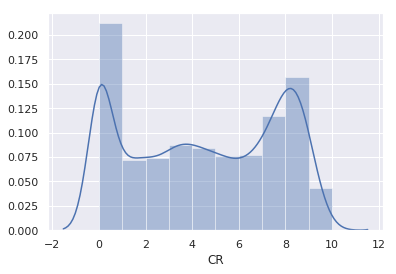

In [23]:
sns.distplot(data.CR, hist=True,bins=10)
plt.show()

#### Ethnicity Distribuition

/home/gassantos/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


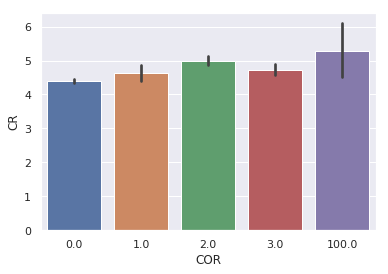

In [24]:
sns.barplot(data.COR, data.CR)
plt.show()

/home/gassantos/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


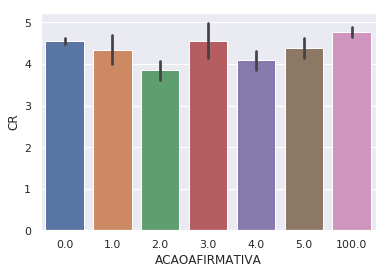

In [25]:
#sns.distplot(data.ACAOAFIRMATIVA, hist=True,bins=10)
sns.barplot(data.ACAOAFIRMATIVA, data.CR)
plt.show()

#### Enrollment Year vs GPA Boxplot

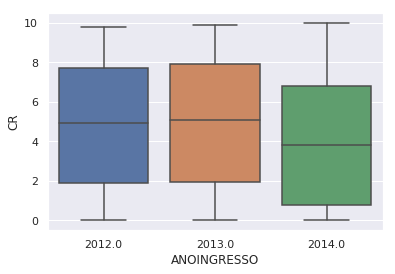

In [26]:
sns.boxplot(data.ANOINGRESSO, data.CR)
plt.show()

In [27]:
#sns.jointplot(data.ANOINGRESSO, y=data.CR, data= df, kind='kde')

#### Ethnicity vs GPA Boxplot

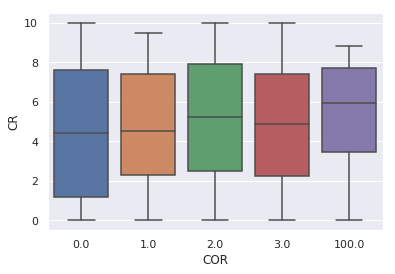

In [28]:
sns.boxplot(data.COR, data.CR)
plt.show()

#### GPA vs Gender vs Ethncity in Violinplot

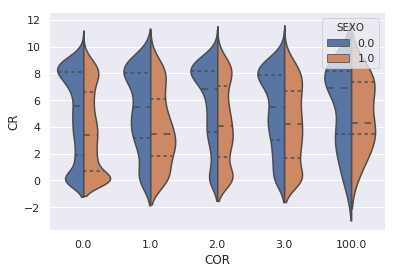

In [29]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="COR", y="CR", hue="SEXO", split=True, inner="quart", data=dataUnique)
sns.despine(left=True)
plt.show()

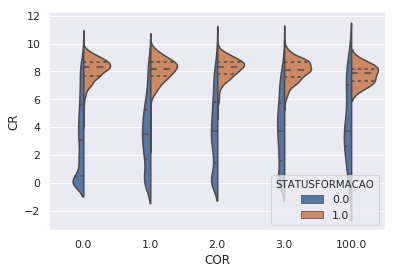

In [30]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="COR", y="CR", hue="STATUSFORMACAO", split=True, inner="quart", data=dataUnique)
sns.despine(left=True)
plt.show()

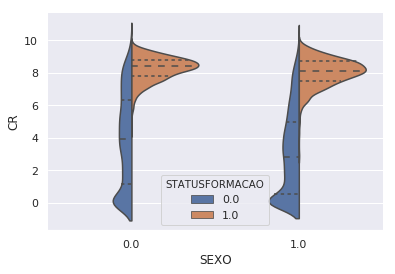

In [31]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="SEXO", y="CR", hue="STATUSFORMACAO", split=True, inner="quart", data=dataUnique)
sns.despine(left=True)
plt.show()

/home/gassantos/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


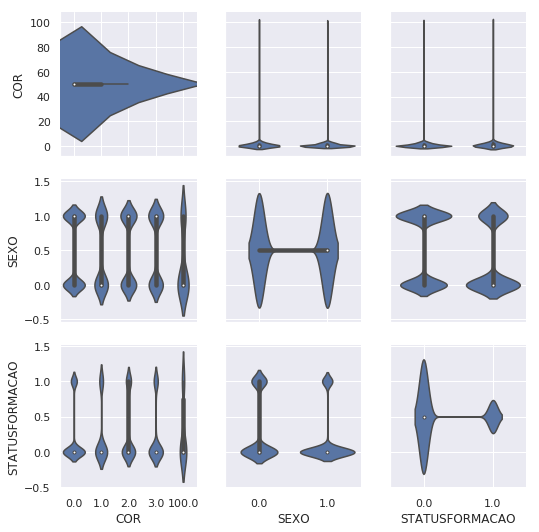

In [32]:
g = sns.PairGrid(dataUnique.loc[:,['COR','SEXO', 'STATUSFORMACAO']], diag_sharey=False)
g.map_upper(sns.violinplot)
g.map_diag(sns.violinplot)
g.map_lower(sns.violinplot, lw=3)
plt.show()

#### Correlation Heatmap 

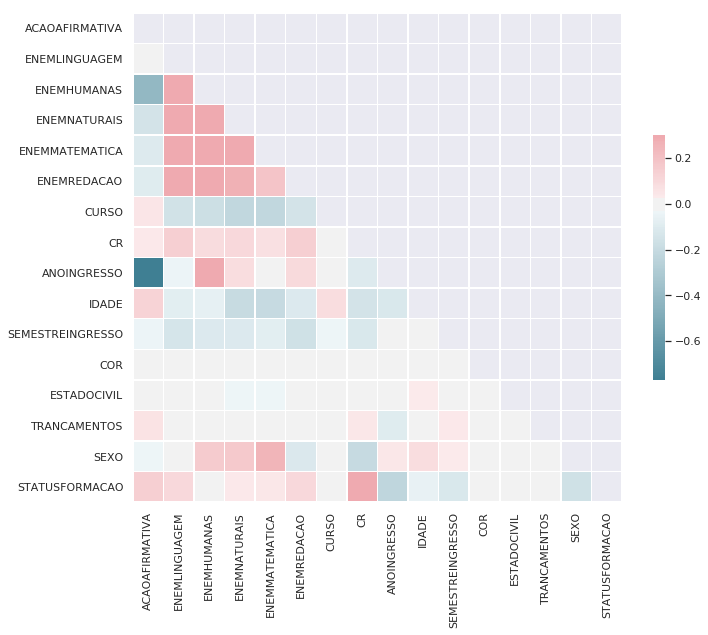

In [33]:
# Compute the correlation matrix
corr = dataUnique.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Comparação de médias: Teste de Turking

In [34]:
print(pairwise_tukeyhsd(dataUnique.CR, dataUnique.ANOINGRESSO))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
2012.0 2013.0  0.1514  -0.0255  0.3282 False 
2012.0 2014.0 -0.7553  -0.9409 -0.5696  True 
2013.0 2014.0 -0.9067  -1.0574 -0.7559  True 
---------------------------------------------


In [35]:
print(pairwise_tukeyhsd(dataUnique.CR, dataUnique.ACAOAFIRMATIVA))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 0.0    1.0   -0.2089  -0.7857  0.3679 False 
 0.0    2.0   -0.6915  -1.0769  -0.306  True 
 0.0    3.0   -0.0062  -0.6476  0.6352 False 
 0.0    4.0   -0.4648   -0.852 -0.0777  True 
 0.0    5.0   -0.1785  -0.5449  0.1879 False 
 0.0   100.0   0.2148  -0.0036  0.4331 False 
 1.0    2.0   -0.4826  -1.1591  0.194  False 
 1.0    3.0    0.2027  -0.6462  1.0515 False 
 1.0    4.0    -0.256  -0.9335  0.4215 False 
 1.0    5.0    0.0304  -0.6355  0.6962 False 
 1.0   100.0   0.4237  -0.1736  1.021  False 
 2.0    3.0    0.6852  -0.0472  1.4177 False 
 2.0    4.0    0.2266  -0.2977  0.7509 False 
 2.0    5.0    0.513    0.0038  1.0221  True 
 2.0   100.0   0.9062   0.4907  1.3218  True 
 3.0    4.0   -0.4586  -1.1919  0.2747 False 
 3.0    5.0   -0.1723  -0.8948  0.5503 False 
 3.0   100.0   0.221   -0.4389  0.8809 False 
 4.0    5.0    0.2863  -0.224

In [36]:
print(pairwise_tukeyhsd(dataUnique.ACAOAFIRMATIVA, dataUnique.SEXO))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 0.0    1.0   -2.9722  -4.3756 -1.5689  True 
---------------------------------------------


In [37]:
print(pairwise_tukeyhsd(dataUnique.CR, dataUnique.COR))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 0.0    1.0    0.2462  -0.1241 0.6165 False 
 0.0    2.0    0.6061   0.3788 0.8334  True 
 0.0    3.0    0.3305   0.0587 0.6023  True 
 0.0   100.0   0.8904  -0.4388 2.2196 False 
 1.0    2.0    0.3599  -0.0547 0.7744 False 
 1.0    3.0    0.0843  -0.3562 0.5248 False 
 1.0   100.0   0.6442  -0.7295 2.0178 False 
 2.0    3.0   -0.2756  -0.6052 0.054  False 
 2.0   100.0   0.2843  -1.0579 1.6265 False 
 3.0   100.0   0.5599  -0.7906 1.9103 False 
--------------------------------------------


# Comparação de médias: ``MultiComparison``

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 0.0    1.0   -0.0429  -0.1344  0.0486 False 
 0.0    2.0   -0.0052  -0.0663  0.0559 False 
 0.0    3.0    0.0017    -0.1   0.1034 False 
 0.0    4.0    0.0236  -0.0378  0.085  False 
 0.0    5.0    0.0357  -0.0224  0.0938 False 
 0.0   100.0  -0.0454   -0.08  -0.0108  True 
 1.0    2.0    0.0377  -0.0696  0.145  False 
 1.0    3.0    0.0446   -0.09   0.1792 False 
 1.0    4.0    0.0665  -0.0409  0.174  False 
 1.0    5.0    0.0786   -0.027  0.1842 False 
 1.0   100.0  -0.0025  -0.0972  0.0922 False 
 2.0    3.0    0.0069  -0.1093  0.123  False 
 2.0    4.0    0.0288  -0.0543  0.112  False 
 2.0    5.0    0.0409  -0.0399  0.1216 False 
 2.0   100.0  -0.0402  -0.1061  0.0257 False 
 3.0    4.0    0.0219  -0.0943  0.1382 False 
 3.0    5.0    0.034   -0.0806  0.1486 False 
 3.0   100.0  -0.0471  -0.1517  0.0576 False 
 4.0    5.0    0.0121  -0.068

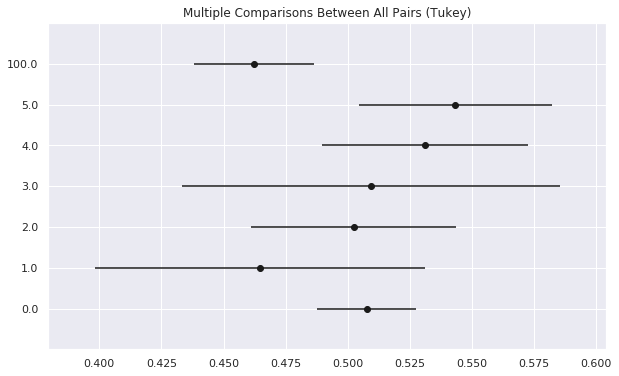

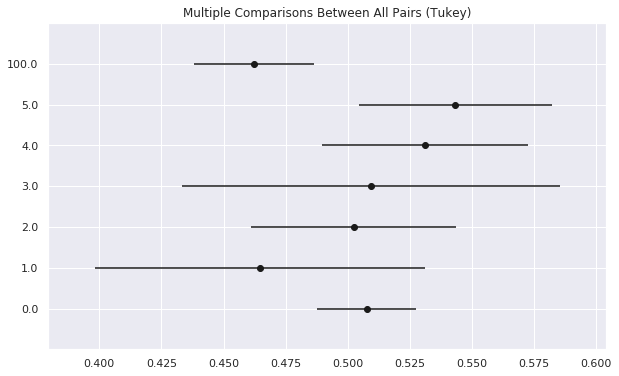

In [38]:
mc = MultiComparison(dataUnique.SEXO, dataUnique.ACAOAFIRMATIVA)
resultsTK = mc.tukeyhsd()
#resultsPT = mc.allpairtest(testfunc=)

print(resultsTK)
resultsTK.plot_simultaneous()

#resultsPT.plot_simultaneous()

# Data Fitting to Applied ML Techniques

In [39]:
dataX = dataUnique.loc[:, 'ACAOAFIRMATIVA':'SEXO']
print(dataX.head())

dataY = dataUnique.loc[:, 'STATUSFORMACAO']
print(dataY.head())

   ACAOAFIRMATIVA  ENEMLINGUAGEM  ENEMHUMANAS  ENEMNATURAIS  ENEMMATEMATICA  \
0           100.0          602.7        544.6         533.3           623.1   
1           100.0          616.9        620.2         564.3           605.1   
2           100.0          628.9        598.2         580.5           702.4   
3           100.0          591.2        561.4         519.2           662.8   
4           100.0          611.4        596.3         559.8           615.7   

   ENEMREDACAO  CURSO   CR  ANOINGRESSO  IDADE  SEMESTREINGRESSO  COR  \
0        780.0    1.0  7.1       2012.0   24.0               1.0  0.0   
1        700.0    1.0  8.4       2012.0   24.0               1.0  3.0   
2        620.0    1.0  9.2       2012.0   24.0               1.0  0.0   
3        760.0    1.0  8.0       2012.0   53.0               1.0  2.0   
4        800.0    1.0  8.2       2012.0   26.0               1.0  0.0   

   ESTADOCIVIL  TRANCAMENTOS  SEXO  
0          0.0           0.0   0.0  
1          0

In [40]:
features = list(dataX)
features

['ACAOAFIRMATIVA',
 'ENEMLINGUAGEM',
 'ENEMHUMANAS',
 'ENEMNATURAIS',
 'ENEMMATEMATICA',
 'ENEMREDACAO',
 'CURSO',
 'CR',
 'ANOINGRESSO',
 'IDADE',
 'SEMESTREINGRESSO',
 'COR',
 'ESTADOCIVIL',
 'TRANCAMENTOS',
 'SEXO']

In [41]:
matrizX = dataX.values
matrizX = np.array(matrizX, dtype=np.float64)

print(matrizX)
print(matrizX.shape)

vectorY = dataY.values
print(vectorY)

print(vectorY.shape) # Quando não funcionar, aplica reshape. Exemplo: vectorY.reshape((2,1))

[[100.  602.7 544.6 ...   0.    0.    0. ]
 [100.  616.9 620.2 ...   0.    0.    0. ]
 [100.  628.9 598.2 ...   0.    0.    0. ]
 ...
 [  0.  652.8 765.9 ...   0.    0.    1. ]
 [  0.  574.2 607.4 ...   0.    0.    1. ]
 [  0.  611.8 645.7 ...   1.    0.    0. ]]
(12171, 15)
[1. 1. 1. ... 0. 0. 1.]
(12171,)


# De forma não supervisionada clusterizar o dado (K-Means)

## Abordagem de Balanceamento não-supervisionado

* K-Means para N-classes

In [42]:
# Let’s split our data into training and test set. We will use sklearn’s train_test_split() method
X_train, X_test, y_train, y_test = train_test_split( matrizX, vectorY, test_size = 0.2) #, random_state = 100)

# Model Selection with K-Folds

# Training Set

In [43]:
print("Train Set - Matrix X: \n", X_train)
print("\nShape - Matrix X: ", X_train.shape)

Train Set - Matrix X: 
 [[  0.  640.7 653.4 ...   0.    0.    0. ]
 [  0.  567.3 705.9 ...   0.    0.    0. ]
 [  0.  496.6 608.5 ...   0.    0.    0. ]
 ...
 [  1.  581.1 595.9 ...   0.    0.    1. ]
 [  3.  539.3 646.7 ...   0.    0.    0. ]
 [  0.  643.7 755.1 ...   0.    1.    0. ]]

Shape - Matrix X:  (9736, 15)


In [44]:
print("\n\nTrain Set - Vector Y: \n", y_train)
print("\nShape - Matrix X: ", y_train.shape)



Train Set - Vector Y: 
 [0. 1. 0. ... 0. 1. 0.]

Shape - Matrix X:  (9736,)


# Testing Set

In [45]:
print("\n\nTest Set - Matriz X: \n", X_test)
print("\nShape - Matrix X: ", X_test.shape)



Test Set - Matriz X: 
 [[  0.  600.9 633.8 ...   0.    0.    0. ]
 [  0.  421.  521.1 ...   0.    0.    1. ]
 [  0.  606.6 661.4 ...   0.    0.    1. ]
 ...
 [100.  568.  525.1 ...   0.    0.    0. ]
 [  0.  685.5 709.  ...   0.    0.    1. ]
 [  0.  531.2 467.9 ...   0.    0.    0. ]]

Shape - Matrix X:  (2435, 15)


In [46]:
print("\n\nTest Set - Vector Y: \n", y_test)
print("\nShape - Vector Y: ", y_test.shape)



Test Set - Vector Y: 
 [0. 0. 0. ... 1. 0. 1.]

Shape - Vector Y:  (2435,)


# Decision Tree to Classification

O aprendizado da árvore de decisão usa uma árvore de decisão como um modelo preditivo que mapeia observações sobre um item para conclusões sobre o valor alvo do item.

É uma das abordagens de modelagem preditiva usadas em estatística, mineração de dados e aprendizado de máquina. Os modelos de árvore em que a variável de destino pode ter um conjunto finito de valores são chamados de árvores de classificação. Nessas estruturas de árvore, as folhas representam os rótulos de classes e os ramos representam conjunções de recursos que levam a esses rótulos de classe. As árvores de decisão em que a variável de destino pode obter valores contínuos (geralmente números reais) são chamadas de árvores de regressão.

Na análise de decisão, uma árvore de decisão pode ser usada para representar visualmente e explicitamente as decisões e a tomada de decisões. Na mineração de dados, uma árvore de decisão descreve dados, mas não decisões; em vez disso, a árvore de classificação resultante pode ser uma entrada para a tomada de decisões.

In [47]:
# Starting Decision Tree
clfDTpadrao = tree.DecisionTreeClassifier()
clfDTpadrao = clfDTpadrao.fit(X_train, y_train)
print(clfDTpadrao)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


# Critérios de Impureza (``Impurity Criterion``)

Existem três medidas de impureza comumente usadas em árvores de decisão binárias: 
* **Entropia** 
* **Índice de Gini**
* **Erro de Classificação**

## Entropia (``entropy``): 

* Uma métrica para medir a _impureza_. A *Entropia* é 0 se todas as amostras de um nó pertencem à mesma classe, e a entropia é máxima se tivermos uma distribuição de classe uniforme. Em outras palavras, a entropia de um nó (consiste em classe única) é zero porque a probabilidade é 1 e log (1) = 0. A entropia atinge o valor máximo quando todas as classes no nó têm probabilidade igual. Sendo assim, a entropia tenta maximizar a informação mútua (construindo um nó de probabilidade igual) na árvore de decisão.

\begin{equation*}
Entropy = \sum_{j} p_{j} log_{2} p_{j}
\end{equation*}

In [48]:
def entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

## Índice de Gini (``gini``): 

* Um critério para minimizar a probabilidade de _erros de classificação_. Semelhante à Entropia, o *Índice de Gini* é maximal se as classes estiverem perfeitamente misturadas, por exemplo, em uma classe binária:

\begin{equation*}
Gini = 1 - \sum_{j} p_{j}^2
\end{equation*}

In [49]:
def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

## Erro de Classificação (``classificationError``)

\begin{equation*}
classificationError = 1 - Max(p_{j})
\end{equation*}

In [50]:
def classification_error(p):
   return 1 - np.max([p, 1 - p])

# Ganho de Informação (``Information Gain``)

Usando um **Algoritmo de Decisão**, começamos na raiz da árvore e dividimos os dados no recurso que resulta no maior ganho de informação (IG). Repetimos esse procedimento de divisão em cada nó filho até as folhas vazias. Isso significa que as amostras em cada nó pertencem à mesma classe.

No entanto, isso pode resultar em uma árvore muito profunda com muitos nós, o que pode facilmente levar ao **_overfitting_**. Assim, normalmente queremos podar a árvore definindo um limite para a profundidade máxima da árvore.

Basicamente, usando IG, queremos determinar qual atributo em um determinado conjunto de vetores de recursos de treinamento é mais útil. Em outras palavras, o IG nos diz o quão importante é um determinado atributo dos vetores de recursos. E com isso, ele é usado para decidir a ordenação de atributos nos nós de uma árvore de decisão.

O **IG** pode ser definido da seguinte forma:

\begin{equation*}
IG(D_p) = I(D_p) - \frac{N_{left}}{N_p}I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right})
\end{equation*}

No qual, _I_ pode ser **entropia, índice de gini ou erro de classificação** e os _D's_ são referentes aos nós Pai, Filho direitor e Filho esquerdo.

# Uma Visualização Gráfica para Representar o ``IG``

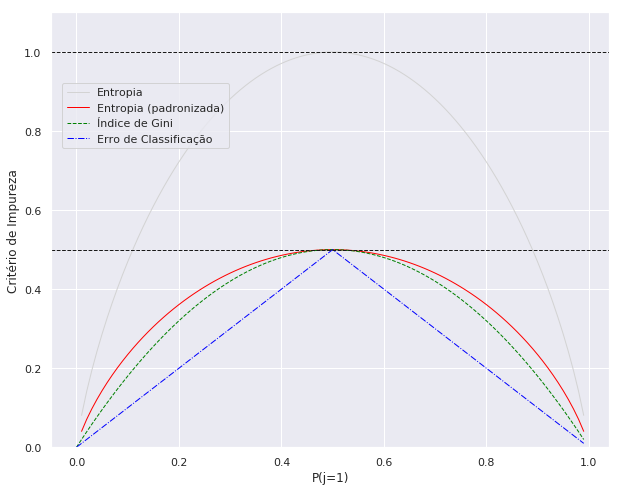

In [51]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
scaled_ent = [e*0.5 if e else None for e in ent]
c_err = [classification_error(i) for i in x]

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [ent, scaled_ent, gini(x), c_err],
      ['Entropia', 'Entropia (padronizada)', 'Índice de Gini', 'Erro de Classificação'],
      ['-', '-', '--', '-.'],
      ['lightgray', 'red', 'green', 'blue']):
   line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85), ncol=1, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('P(j=1)')
plt.ylabel('Critério de Impureza')
plt.show()

In [52]:
# Building visualization by Graph with Gini Classifier
dataClass = tree.export_graphviz(clfDTpadrao, out_file=None, filled=True, rounded=True,  
                                 special_characters=True, feature_names=features )  
graph = graphviz.Source(dataClass)
graph.render("clfDTpadrao") # Save in PDF

'clfDTpadrao.pdf'

In [53]:
# Prediction for Decision Tree classifier with criterion as gini index
y_pred = clfDTpadrao.predict(X_test)
print(y_pred)

# Accuracy for Decision Tree classifier with criterion as gini index
print("\nAccuracy is ", accuracy_score(y_test,y_pred)*100)

[0. 0. 0. ... 1. 1. 0.]

Accuracy is  87.43326488706366


In [54]:
# Starting Decision Tree
clfDTpadraoDepth3 = tree.DecisionTreeClassifier(max_depth=3)
clfDTpadraoDepth3 = clfDTpadraoDepth3.fit(X_train, y_train)
clfDTpadraoDepth3

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

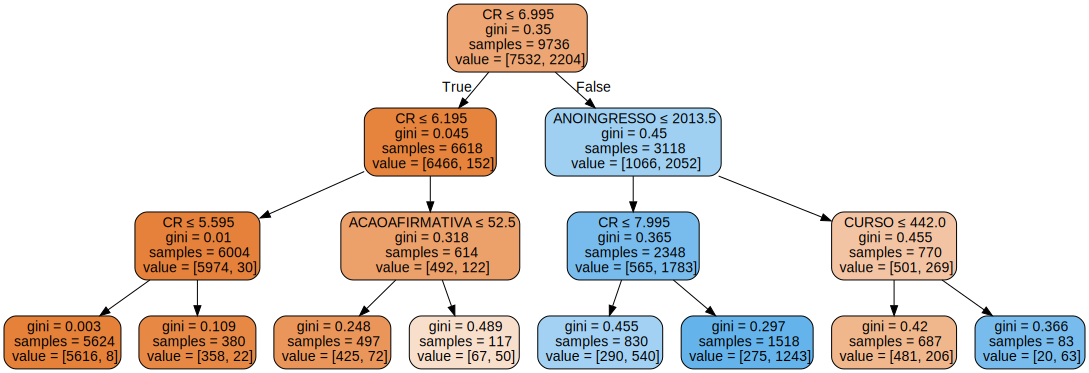

In [55]:
# Building visualization by Graph with Gini Classifier
dataClass = tree.export_graphviz(clfDTpadraoDepth3, out_file=None, filled=True, rounded=True,  
                                 special_characters=True, feature_names=features )  
graph = graphviz.Source(dataClass)  
graph 

In [56]:
# Starting Decision Tree
clfDTEntropyDepth3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clfDTEntropyDepth3 = clfDTEntropyDepth3.fit(X_train, y_train)
clfDTEntropyDepth3

# Building visualization by Graph with Gini Classifier
dataClass = tree.export_graphviz(clfDTEntropyDepth3, out_file=None, filled=True, rounded=True,  
                                 special_characters=True, feature_names=features )  
graph = graphviz.Source(dataClass)  
#graph 

clfDTEntropyDepth3

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
# Prediction for Decision Tree classifier with criterion as gini index
y_pred_depth3 = clfDTpadraoDepth3.predict(X_test)
y_pred_depth3

array([0., 0., 0., ..., 1., 0., 0.])

In [58]:
# Accuracy for Decision Tree classifier with criterion as gini index
print("Accuracy is ", accuracy_score(y_test, y_pred_depth3)*100)

Accuracy is  90.2258726899384


# Confusion Matrix for Decision Tree

#### Outros exemplos podem ser vistos em: http://scikit-learn.org/stable/modules/model_evaluation.html

In [59]:
# Evaluate the Matthew’s correlation coefficient (MCC) for binary classes
print(matthews_corrcoef(y_test, y_pred_depth3))

0.718905925550186


In [60]:
# Evaluate Classification Report
print(classification_report(y_test, y_pred_depth3))

             precision    recall  f1-score   support

        0.0       0.95      0.93      0.94      1907
        1.0       0.76      0.80      0.78       528

avg / total       0.90      0.90      0.90      2435



### Non-normalized

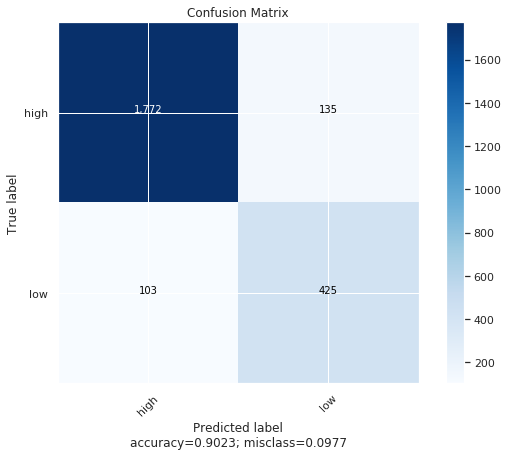

In [61]:
plot_confusion_matrix( confusion_matrix(y_test, y_pred_depth3), normalize = False,
                       target_names = ['high', 'low'], title = "Confusion Matrix")

# Normalized

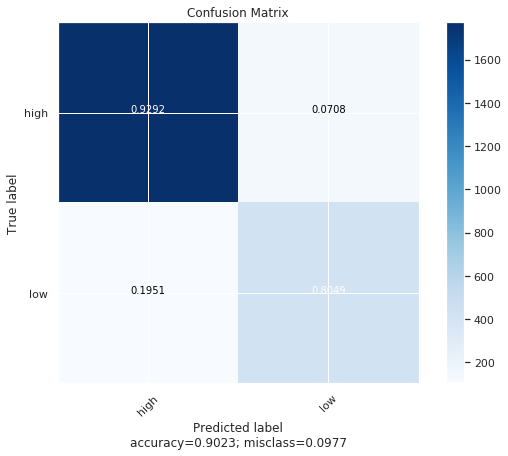

In [62]:
plot_confusion_matrix( confusion_matrix(y_test, y_pred_depth3), normalize = True,
                       target_names = ['high', 'low'], title = "Confusion Matrix")

# Using Logistic Regression for Classification

In [63]:
logReg = LogisticRegression()
logReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
# Accuracy for Logistic Regression
logReg_prediction = logReg.predict(X_test)
print(logReg_prediction)
print("\n\nAccuracy is ", accuracy_score(y_test, logReg_prediction)*100)

[0. 0. 0. ... 1. 0. 1.]


Accuracy is  89.36344969199178


In [65]:
# Evaluate Classification Report
print(classification_report(y_test, logReg_prediction))

             precision    recall  f1-score   support

        0.0       0.94      0.93      0.93      1907
        1.0       0.75      0.77      0.76       528

avg / total       0.89      0.89      0.89      2435



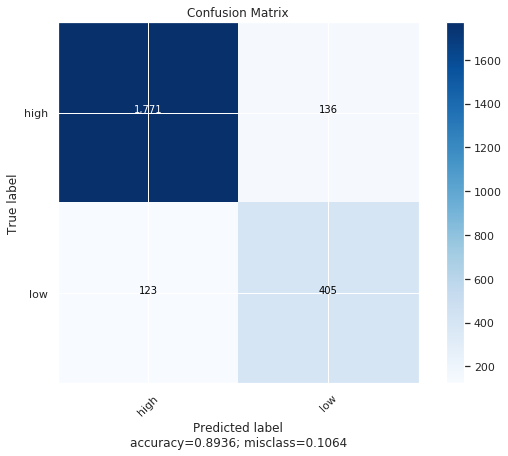

In [66]:
plot_confusion_matrix( confusion_matrix(y_test, logReg_prediction), normalize = False,
                       target_names = ['high', 'low'], title = "Confusion Matrix")

# Using SVM for Classification

In [67]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_prediction = svm.predict(X_test)
print(svm_prediction)
print("\n\nAccuracy is ", accuracy_score(y_test, svm_prediction)*100)

[0. 0. 0. ... 1. 0. 1.]


Accuracy is  90.47227926078028


In [68]:
print(classification_report(y_test, svm_prediction))

             precision    recall  f1-score   support

        0.0       0.94      0.94      0.94      1907
        1.0       0.77      0.79      0.78       528

avg / total       0.91      0.90      0.91      2435



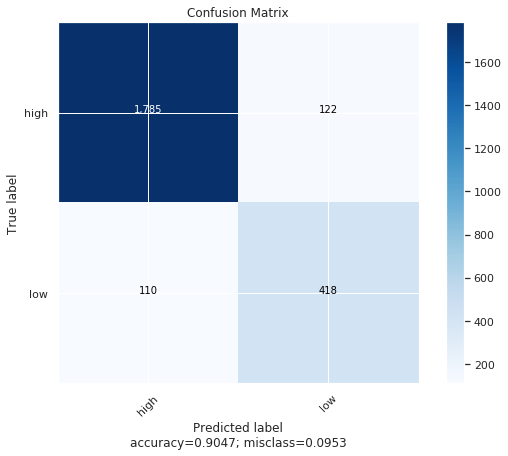

In [69]:
plot_confusion_matrix( confusion_matrix(y_test, svm_prediction), normalize = False,
                       target_names = ['high', 'low'], title = "Confusion Matrix")